<a href="https://colab.research.google.com/github/udaygrover0/Fraud-Analytics-Anomaly-Detection-/blob/main/Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df = pd.read_csv("/drive/MyDrive/FAAD/celeba_baldvsnonbald_normalised.csv")

In [10]:
df.dtypes

,0
A0,int64
A1,int64
A2,int64
A3,int64
A4,int64
A5,int64
A6,int64
A7,int64
A8,int64
A9,int64


In [58]:
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A30,A31,A32,A33,A34,A35,A36,A37,A38,class
0,1,1,0,1,1,0,1,1,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,0,0
3,1,1,1,0,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,0,0
4,1,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0


<Axes: >

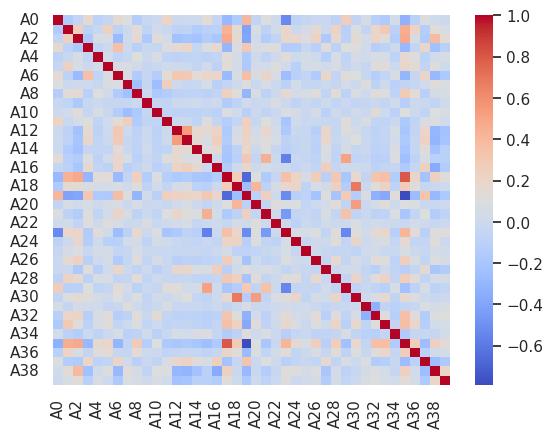

In [56]:
# prompt: make corelation matrix


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

<Axes: title={'center': 'Feature Importance'}>

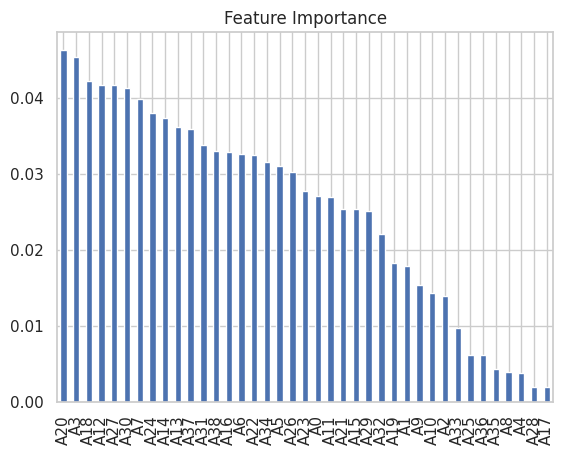

In [57]:
from sklearn.ensemble import RandomForestClassifier

X = df[columns]
y = df['class']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')


In [65]:
df['class'].value_counts()

,count
class,
0,198052
1,4547


<ipython-input-17-f2aad7649695>:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


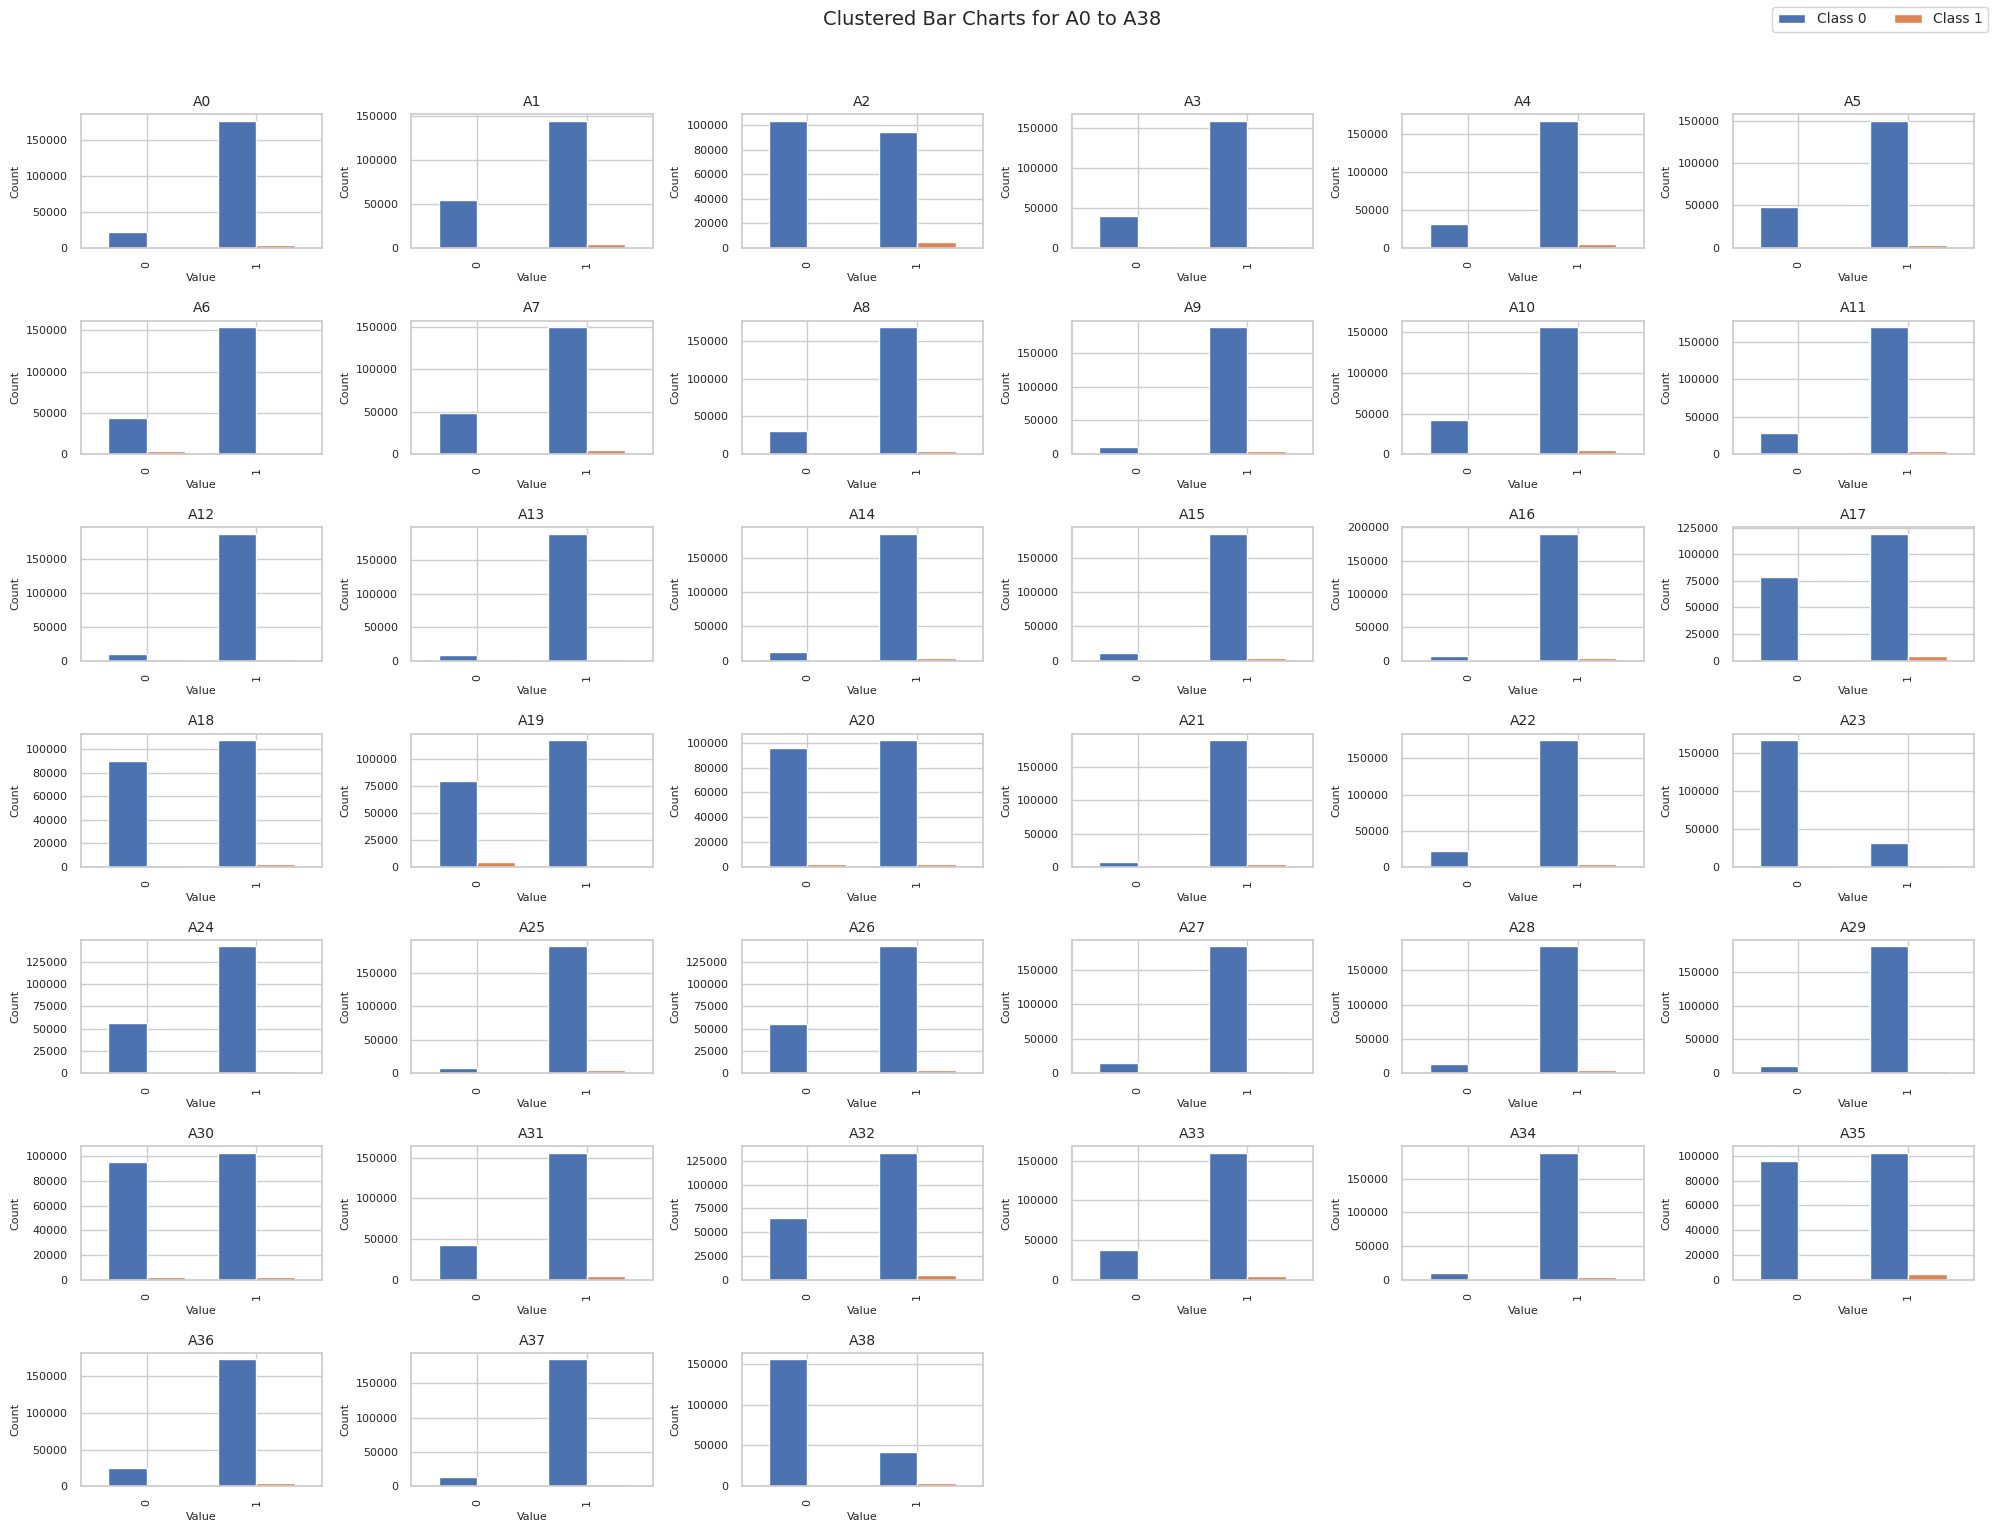

In [17]:
# prompt: Make a combined clustered bar chart for each for A0 to A38 where you can plot based on value of each vale as 0 or 1 how value class is 0 or 1

# Define columns as the features starting with 'A' except 'class'
columns = [col for col in df.columns if col.startswith('A') and col != 'class']

# Determine the grid size for subplots
n_cols = 6  # Number of columns in the grid
n_rows = math.ceil(len(columns) / n_cols)  # Number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in its respective subplot
for i, col in enumerate(columns):
    # Count occurrences of each combination of column value and class
    counts = df.groupby([col, 'class']).size().unstack(fill_value=0)

    # Plot the data in a bar chart
    counts.plot(kind='bar', ax=axes[i], width=0.7, legend=False)
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('Value', fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Add a legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Class 0', 'Class 1'], loc='upper right', ncol=2, fontsize=10)

# Show the combined plot
plt.suptitle('Clustered Bar Charts for A0 to A38', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()




In [21]:
# Class count
count_class_0, count_class_1 = df['class'].value_counts()

# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]

# Using SMOTE for Oversampling

In [23]:
X = df.drop('class',axis='columns')
y = df['class']

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Check the distribution of the target variable
import pandas as pd
y_sm_series = pd.Series(y_sm)
y_sm_series.value_counts()

,count
class,
0,198052
1,198052


# Supervised Learning

##Random Forest

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     39784
           1       0.96      0.99      0.98     39437

    accuracy                           0.98     79221
   macro avg       0.98      0.98      0.98     79221
weighted avg       0.98      0.98      0.98     79221



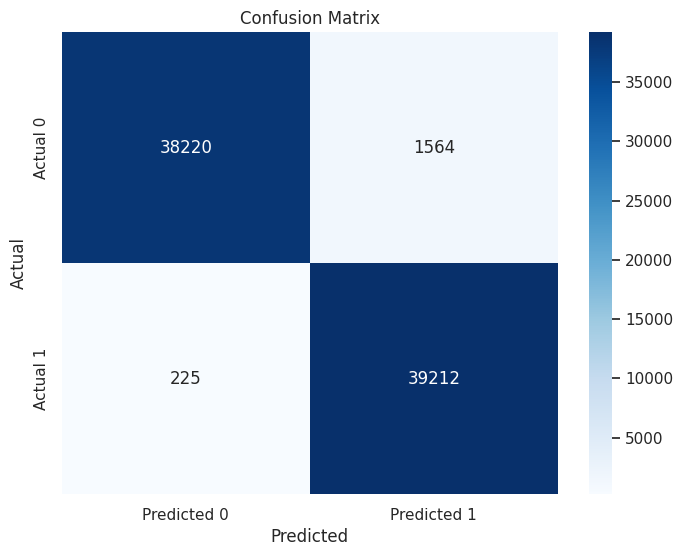

In [71]:
# prompt: Create Random forest for A0 to A38 for Class and also validate & Visualise it

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_sm and y_sm are already defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Neural Network

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=321057, stratify=y_sm)

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9148 - loss: 0.2206 - val_accuracy: 0.9392 - val_loss: 0.1673
Epoch 2/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9399 - loss: 0.1685 - val_accuracy: 0.9386 - val_loss: 0.1688
Epoch 3/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9419 - loss: 0.1626 - val_accuracy: 0.9429 - val_loss: 0.1591
Epoch 4/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9434 - loss: 0.1585 - val_accuracy: 0.9422 - val_loss: 0.1583
Epoch 5/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9451 - loss: 0.1538 - val_accuracy: 0.9457 - val_loss: 0.1526
Epoch 6/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9451 - loss: 0.1532 - val_accuracy: 0.9461 - val_loss: 0.1510
Epoch 7/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9463 - loss: 0.1513 - val_accuracy: 0.9482 - val_loss: 0.1460
Epoch 8/100
9903/9903 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9474 -

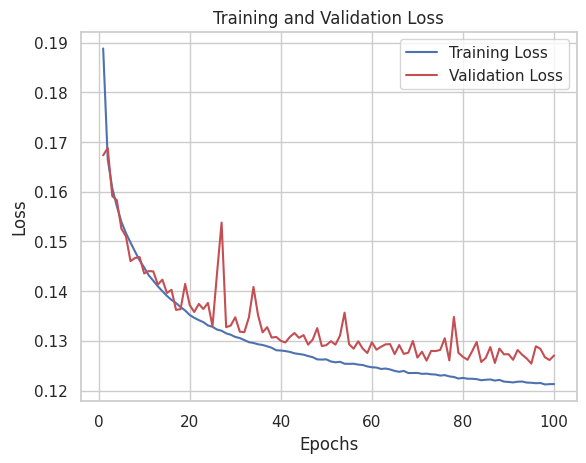

In [52]:
# prompt: I want to plot model's loss and val_loss

import matplotlib.pyplot as plt

# The ANN function needs to be modified to return the history object
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(39, input_dim=39, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        history = model.fit(X_train, y_train, epochs=100,validation_data = (X_test, y_test)) # Assign history here
    else:
        history = model.fit(X_train, y_train, epochs=100, class_weight = weights,validation_data = (X_test, y_test)) # Assign history here

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds, history # Return history


# Call ANN and get the history object
y_preds, history = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

# Access the loss and val_loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and val_loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Supervised Learning

##Autoencoders

Epoch 1/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.9300 - val_loss: 0.8358
Epoch 2/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.8328 - val_loss: 0.8269
Epoch 3/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8233 - val_loss: 0.8228
Epoch 4/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8203 - val_loss: 0.8201
Epoch 5/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8187 - val_loss: 0.8185
Epoch 6/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8162 - val_loss: 0.8175
Epoch 7/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8170 - val_loss: 0.8167
Epoch 8/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.8141 - val_loss: 0.8162
Epoch 9/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8149 - val_loss: 0.8157
Epoch 10/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8134 - val_loss: 0.8147
Epoch 11/50
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.8136 - val_loss: 0.8140
Epoch 12/50
5065/5065

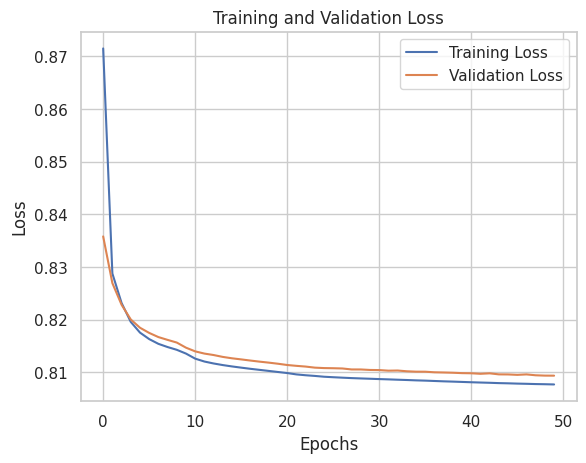

6332/6332 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


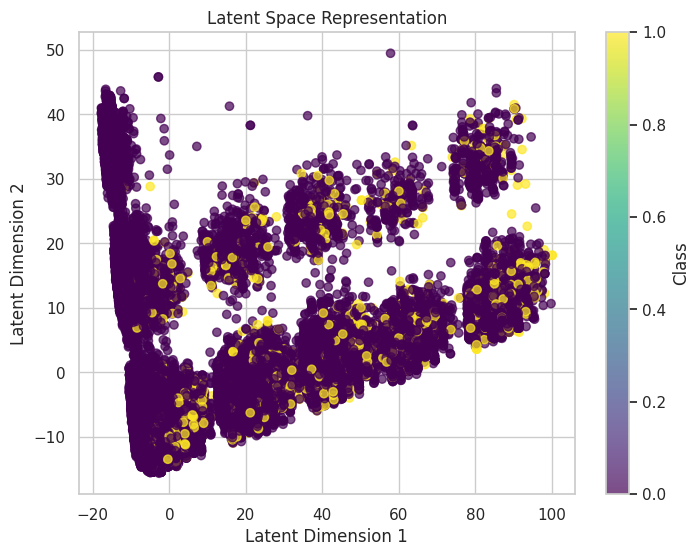

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
X = df[[col for col in df.columns if col.startswith('A')]].values  # Features (A0 to A38)

# Standardize the data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Define the autoencoder
input_dim = X_scaled.shape[1]  # Number of features
encoding_dim = 10  # Latent space size (compress to 10 dimensions)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model (for extracting latent features)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # Mean squared error is common for reconstruction tasks

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 4: Visualize the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Visualize the encoded (latent) space
encoded_data = encoder.predict(X_scaled)

# Reduce to 2D for visualization using PCA (if latent space > 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
encoded_2d = pca.fit_transform(encoded_data)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=df['class'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('Latent Space Representation')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


6332/6332 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Anomaly Threshold: 2.590883781804653
Number of Anomalies Detected: 2026


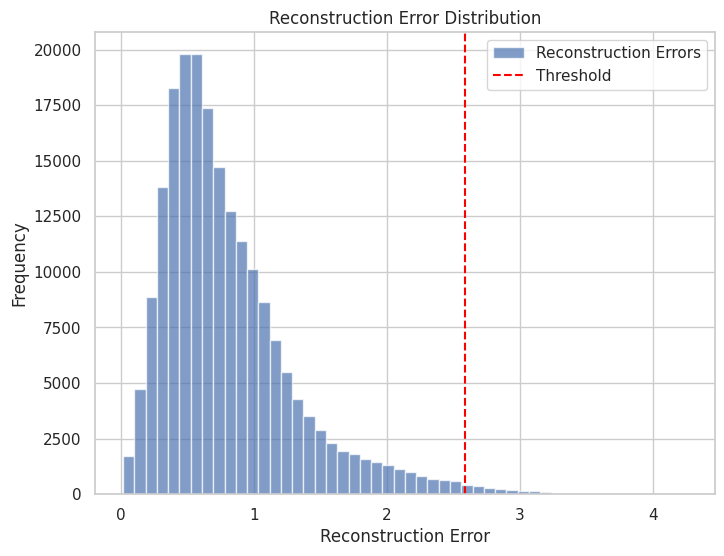

Anomalous Data:
        A0  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A30  A31  A32  A33  A34  \
59       1   1   1   1   1   0   0   1   1   1  ...    1    1    1    1    0   
144      1   1   1   0   1   1   1   1   1   1  ...    1    1    1    1    1   
154      0   1   1   1   1   0   0   1   1   1  ...    1    1    1    1    1   
192      1   1   1   1   1   0   0   0   1   1  ...    1    1    1    1    1   
214      1   0   1   1   1   1   0   1   1   1  ...    1    1    1    1    1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
202215   1   1   1   0   1   1   0   0   1   0  ...    0    1    1    1    1   
202219   1   1   1   1   1   1   0   1   1   1  ...    1    1    1    1    1   
202275   0   1   0   0   1   1   0   1   1   1  ...    0    1    1    1    1   
202544   1   1   1   0   1   1   0   1   1   1  ...    1    0    1    1    1   
202549   0   0   1   0   1   0   0   0   1   1  ...    0    1    1    0    1   

        A35  A36  A37  

In [70]:
# Step 1: Reconstruct the input data
reconstructed_data = autoencoder.predict(X_scaled)

# Step 2: Calculate reconstruction errors
reconstruction_errors = np.mean((X_scaled - reconstructed_data) ** 2, axis=1)

# Step 3: Determine a threshold for anomalies
threshold = np.percentile(reconstruction_errors, 99)  # 99th percentile as threshold
print(f"Anomaly Threshold: {threshold}")

# Step 4: Flag anomalies
anomalies = reconstruction_errors > threshold
print(f"Number of Anomalies Detected: {np.sum(anomalies)}")

# Step 5: Visualize anomalies
plt.figure(figsize=(8, 6))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label='Reconstruction Errors')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Analyze the anomalies
anomalous_data = df[anomalies]
print("Anomalous Data:")
print(anomalous_data)
